# Aula 16 - Introdução à Ciência de Dados

Nesta aula vamos começar a utilizar ferramentas de Data Science para carregar dados, gerar estatísticas e gráficos.

Vamos ver algumas funcionalidades da biblioteca pandas (https://pandas.pydata.org/) e do seaborn (https://seaborn.pydata.org/)

Neste momento aprenderemos apenas as técnicas de **Análise Exploratória**, que é o momento onde carregamos e entedemos os tipos de dados que temos. Os próximos passos em um pipeline de Data Science envolvem encontrar modelos de Aprendizado de Máquina (regressão, classificação, agrupamento, redução de dimensionalidade, etc) que sejam adequados aos nossos propósitos (resolvam os problemas que queremos). Vamos aprender a usar essas técnicas nas próximas aulas.

--------------------------

## Exemplo 1 - Entomologia: Gafanhatos vs Esperanças

![image-2.png](attachment:image-2.png)

Foram medidos o comprimento das antenas e do abdômen de dois tipos de insetos: gafanhotos e esperanças. 

Carregue os dados do arquivo .csv fornecido e gere estatísticas e gráficos.

In [ ]:
import pandas as pd # lib para trabalhar com tabelas

In [2]:
dados = pd.read_csv('gaf_esp.csv', sep=';') # Estamos carregando o arquivo csv usando o ; como separador e criando um objeto

Os dados carregados no pandas estão em uma estrutura de dados chamada DataFrame. Este é o objeto que o pandas cria para representar os dados da tabela. Como todo objeto em POO (programação orientada à objeto), ele possui métodos que podem ser chamados. 

Para chamar um método de um objeto, basta escrever o nome da variável do objeto e colocar um . (ponto) na frente, evocando na sequência o nome do método seguido de  parenteses (arg), onde os argumentos arg podem ou não ser passados, dependendo do método.

Vejamos dois exemplos de head():

In [3]:
dados.head() # o número passado para o método head é o número de linhas que queremos ver (por default 5)

,Espécie,Comprimento do Abdômen,Comprimento das Antenas
0,Gafanhoto,0.50,7.0
1,Gafanhoto,0.50,6.0
2,Gafanhoto,0.60,5.5
3,Gafanhoto,0.65,4.5
4,Gafanhoto,0.54,3.2


In [5]:
dados.head(10) # passando 10 como argumento do método head

,Espécie,Comprimento do Abdômen,Comprimento das Antenas
0,Gafanhoto,0.50,7.0
1,Gafanhoto,0.50,6.0
2,Gafanhoto,0.60,5.5
3,Gafanhoto,0.65,4.5
4,Gafanhoto,0.54,3.2
...,...,...,...
95,Esperança,9.75,6.2
96,Esperança,6.20,8.1
97,Esperança,9.20,4.7
98,Esperança,9.10,6.0


In [6]:
dados.tail()

,Espécie,Comprimento do Abdômen,Comprimento das Antenas
95,Esperança,9.75,6.2
96,Esperança,6.20,8.1
97,Esperança,9.20,4.7
98,Esperança,9.10,6.0
99,Esperança,8.29,7.0


No pandas podemos acessar as colunas através do nome, de forma parecida com um dicionário:

In [7]:
dados['Espécie']

0     Gafanhoto
1     Gafanhoto
2     Gafanhoto
3     Gafanhoto
4     Gafanhoto
        ...    
95    Esperança
96    Esperança
97    Esperança
98    Esperança
99    Esperança
Name: Espécie, Length: 100, dtype: object

Vejamos quais são os tipos da estruturas de dados de uma **Tabela Pandas** e de uma **Coluna Pandas**:

In [8]:
type(dados) # As tabelas dos pandas são objetos chamados de dataframes

pandas.core.frame.DataFrame

In [ ]:
type(dados['Espécie']) # Já as colunas são objetos chamados de séries

In [11]:
dados['Comprimento do Abdômen'][3] # Podemos acessar através do nome + índice

0.65

Para transformar uma série em uma lista nativa do Python, podemos fazer:

In [ ]:
list(dados['Espécie']) # Casting para lista nativa do Python

Agora vamos usar isso para contar quantos exemplos (entradas) temos de cada espécie:

In [12]:
list(dados['Espécie']).count('Gafanhoto')

50

In [13]:
list(dados['Espécie']).count('Esperança') # Fazendo Casting e usando método da lista nativa para contar

50

In [15]:
novo_dataframe = {
    'alturas':[10, 14, 20],
    'localidade':['São Paulo', 'Rio de Janeiro', 'Monkey Island'],
    'latitude': [35, 37, 40],
    'longitude':[-70, -68, -71],
}

In [17]:
df = pd.DataFrame(data=novo_dataframe)

In [18]:
type(df)

pandas.core.frame.DataFrame

In [19]:
df.head(20)

,alturas,localidade,latitude,longitude
0,10,São Paulo,35,-70
1,14,Rio de Janeiro,37,-68
2,20,,40,-71


### Estatísticas

Vamos calcular algumas estatísticas

In [20]:
import statistics

In [21]:
media_cab = statistics.mean(dados['Comprimento do Abdômen']) # Média do Comp. Abdômen
media_can = statistics.mean(dados['Comprimento das Antenas']) # Média do Comp. Antena
std_cab = statistics.stdev(dados['Comprimento do Abdômen']) # Desvio Padrão Amostral do Comp. Abdômen
std_can = statistics.stdev(dados['Comprimento das Antenas']) # Desvio Padrão Amostra do Com. Antena

In [22]:
print('Média Comp. Abdômen: ', media_cab)
print('Média Comp. Antena: ', media_can)
print('Desvio Padrão Amostral do Comp. Abdômen: ', std_cab)
print('Desvio Padrão Amostral do Comp. Antena: ', std_can)

Média Comp. Abdômen:  4.9362
Média Comp. Antena:  5.3824
Desvio Padrão Amostral do Comp. Abdômen:  3.3438062084391134
Desvio Padrão Amostral do Comp. Antena:  2.2960005279272964


Esses valores foram calculados para todos os dados.

Vamos recalcular para cada uma das espécies.

Para isso, vamos separar os dados em dois dataframes:

In [23]:
dados_gaf = dados[dados['Espécie']=='Gafanhoto'] # Aqui estamos criando um dataframe só com gafanhotos

In [29]:
dados_gaf.head()

,Espécie,Comprimento do Abdômen,Comprimento das Antenas
0,Gafanhoto,0.50,7.0
1,Gafanhoto,0.50,6.0
2,Gafanhoto,0.60,5.5
3,Gafanhoto,0.65,4.5
4,Gafanhoto,0.54,3.2


In [27]:
dados_esp = dados[dados['Espécie']=='Esperança'] # E aqui um dataframe só com esperanças

In [30]:
dados_esp.head()

,Espécie,Comprimento do Abdômen,Comprimento das Antenas
50,Esperança,8.3,6.6
51,Esperança,8.1,4.7
52,Esperança,8.0,9.1
53,Esperança,5.4,8.5
54,Esperança,10.0,4.5


In [31]:
media_cab_gaf = statistics.mean(dados_gaf['Comprimento do Abdômen']) # Média do Comp. Abdômen
media_can_gaf = statistics.mean(dados_gaf['Comprimento das Antenas']) # Média do Comp. Antena
std_cab_gaf = statistics.stdev(dados_gaf['Comprimento do Abdômen']) # Desvio Padrão Amostral do Comp. Abdômen
std_can_gaf = statistics.stdev(dados_gaf['Comprimento das Antenas']) # Desvio Padrão Amostra do Com. Antena

In [32]:
print('Média Comp. Abdômen: ', media_cab_gaf)
print('Média Comp. Antena: ', media_can_gaf)
print('Desvio Padrão Amostral do Comp. Abdômen: ', std_cab_gaf)
print('Desvio Padrão Amostral do Comp. Antena: ', std_can_gaf)

Média Comp. Abdômen:  1.7518
Média Comp. Antena:  3.5492
Desvio Padrão Amostral do Comp. Abdômen:  0.7869410941832214
Desvio Padrão Amostral do Comp. Antena:  1.41786105073229


In [33]:
media_cab_esp = statistics.mean(dados_esp['Comprimento do Abdômen']) # Média do Comp. Abdômen
media_can_esp = statistics.mean(dados_esp['Comprimento das Antenas']) # Média do Comp. Antena
std_cab_esp = statistics.stdev(dados_esp['Comprimento do Abdômen']) # Desvio Padrão Amostral do Comp. Abdômen
std_can_esp = statistics.stdev(dados_esp['Comprimento das Antenas']) # Desvio Padrão Amostra do Com. Antena

In [34]:
print('Média Comp. Abdômen: ', media_cab_esp)
print('Média Comp. Antena: ', media_can_esp)
print('Desvio Padrão Amostral do Comp. Abdômen: ', std_cab_esp)
print('Desvio Padrão Amostral do Comp. Antena: ', std_can_esp)

Média Comp. Abdômen:  8.1206
Média Comp. Antena:  7.2156
Desvio Padrão Amostral do Comp. Abdômen:  1.1297289001150241
Desvio Padrão Amostral do Comp. Antena:  1.334945019123122


### Gráficos

Vamos começar plotando os histogramas usando o Seaborn e o Matplotlib:

In [35]:
import matplotlib.pyplot as plt  
import seaborn as sns

[Text(0, 0.5, 'Contagem'), Text(0.5, 0, 'Comprimento das Antenas')]

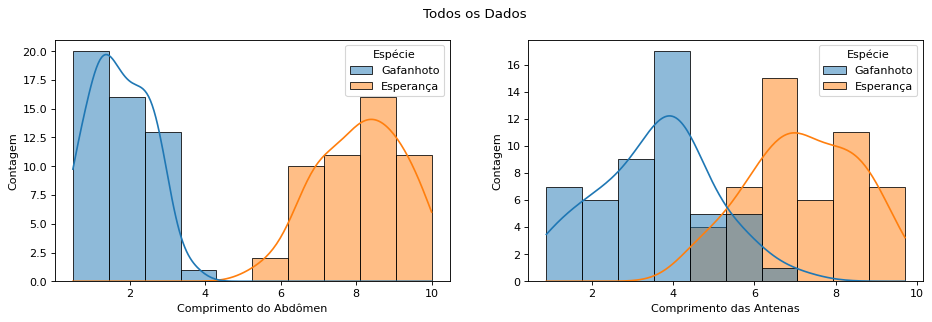

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4), dpi=80)
fig.suptitle('Todos os Dados')


sns.histplot(ax=axes[0], # Local da figura onde o gráfico será mostrado
            data=dados,  # Perceba que estamos passando a coluna do dataframe completo
            kde=True, # Linha estimada da densidade de probabilidade
            bins=10,
            x = 'Comprimento do Abdômen',
            hue='Espécie',
            linewidth=0.7,
            )

sns.histplot(ax=axes[1],
            data=dados,
            kde=True,
            bins=10,
            x = 'Comprimento das Antenas',
            hue='Espécie',
            linewidth=0.7,
            )

axes[0].set(xlabel='Comprimento do Abdômen', ylabel='Contagem') # Setando nome dos eixos
axes[1].set(xlabel='Comprimento das Antenas', ylabel='Contagem')

[Text(0, 0.5, 'Contagem'), Text(0.5, 0, 'Comprimento das Antenas')]

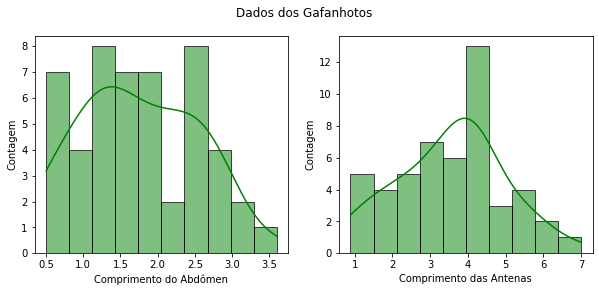

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Dados dos Gafanhotos')


sns.histplot(ax=axes[0],
            data=dados_gaf['Comprimento do Abdômen'], # Agora a coluna do dataframe só com gafanhotos
            kde=True,
            bins=10,
            linewidth=0.7,
            color='green'
            )

sns.histplot(ax=axes[1],
            data=dados_gaf['Comprimento das Antenas'],
            kde=True,
            bins=10,
            linewidth=0.7,
            color='green'
            )

axes[0].set(xlabel='Comprimento do Abdômen', ylabel='Contagem')
axes[1].set(xlabel='Comprimento das Antenas', ylabel='Contagem')

[Text(0, 0.5, 'Contagem'), Text(0.5, 0, 'Comprimento das Antenas')]

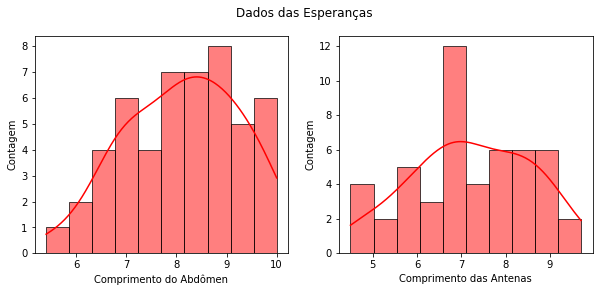

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Dados das Esperanças')


sns.histplot(ax=axes[0],
            data=dados_esp['Comprimento do Abdômen'],
            kde=True,
            bins=10,
            linewidth=0.7,
            color = 'red'
            )

sns.histplot(ax=axes[1],
            data=dados_esp['Comprimento das Antenas'],
            kde=True,
            bins=10,
            linewidth=0.7,
            color = 'red'
            )

axes[0].set(xlabel='Comprimento do Abdômen', ylabel='Contagem')
axes[1].set(xlabel='Comprimento das Antenas', ylabel='Contagem')

Vamos ver um boxplot:

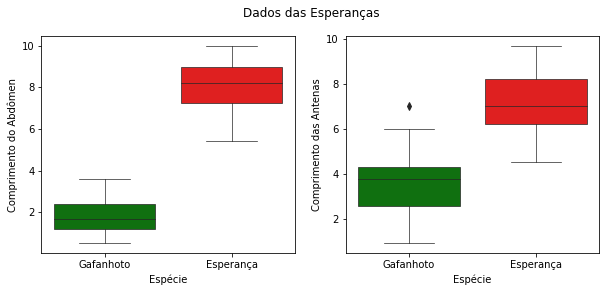

In [57]:
# boxplot é um jeito visualmente interessante para comparar gráficos
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Dados das Esperanças')

sns.boxplot(x="Espécie", y="Comprimento do Abdômen",
            palette=["g", "r"],
            linewidth=0.7,
            ax=axes[0],
            data=dados
           )

sns.boxplot(x="Espécie", y="Comprimento das Antenas",
            palette=["g", "r"],
            linewidth=0.7,
            ax=axes[1],
            data=dados
           )

Vamos ver agora um gráfico de dispersão do Comprimento das Antenas em função do Comprimento do Abdômen. Vamos adicionar os histogramas de cada variável na lateral do eixo correspondente. Também vamos indicar para o método do Seaborn que existem duas espécies.

In [ ]:
sns.jointplot(data=dados,
              x="Comprimento do Abdômen", y="Comprimento das Antenas",
              height=5, 
              ratio=2,
              marginal_ticks=True,
              hue = 'Espécie'
             )

----------------------
## Exemplo 2 - Botânica: Íris Dataset

Esse dataset contém medidas da largura e comprimento da pétala e da sépala de **150 amostras** de flores, assim como a espécie de cada uma (*versicolor*, *setosa*, *virginica*). Mais informações: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html.

<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png" alt="dieta" width="600px">

Dentro da biblioteca Scikit Learn há bases da dados prontas utilizadas para exemplos e testes.

Vamos importar essa base dados usando o comando:

In [66]:
from sklearn import datasets

Agora vamos carregar os dados do dataset Iris:

In [67]:
# Carregando os dados
iris = datasets.load_iris()

In [ ]:
# Dê um print(iris) para ver como os dados estão estruturados nessa variável (objeto)
# Perceba que é parecido com um dicioário nativo do Python
print(iris)

In [69]:
type(iris) # Entretanto, para saber qual a 'estrutura de dados' da variável iris corretamente

sklearn.utils.Bunch

In [71]:
iris.keys() # Para saber as 'chaves'

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [72]:
iris['feature_names'] # Acessar como em um dicionário

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [73]:
iris.feature_names # Acessar como atributo de um objeto

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Para facilitar a visualização dos dados, vamos usar o pandas.

Para isso, vamos criar um dataframe pandas que recebe como dados os atributos do objeto iris que criamos acima.

In [74]:
import pandas as pd

In [75]:
dados = pd.DataFrame(data=iris.data,  # Estamos dizendo que o dados do dataframe são o atributo data do objeto iris
                     columns = iris.feature_names) # Já o nome das colunas do dataframe serão o atrib feature_names

In [76]:
dados.head() # Para vermos as linhas do dataframe (o número passado no head será o número de linhas printadas)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Vamos adicionar a essa tabela, os correspondentes nomes das flores 

In [77]:
dados['flower'] = iris.target

In [80]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [78]:
dados.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Neste dataset, cada número corresponde a uma classe de flor. Vamos transformar para aparecer o nome de cada uma. Para isso faremos uma função que irá mapear os nomes de acordo com os números. Vamos aplicar a função sobre uma coluna inteira do nosso dataframe.

In [79]:
iris.target_names  # Aqui estamos vendo os nomes que vem junto com o dataset

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [81]:
# Aqui estamos criando uma funcao que recebe o número da classe e retorna o nome correspondente
def mapear_nomes(numero_classe):
    flower_map = {
        0:iris.target_names[0],
        1:iris.target_names[1],
        2:iris.target_names[2]
    }
    return(flower_map[numero_classe])

In [82]:
# O pandas permite que nos apliquemos uma função para todas as entradas de uma coluna
# Observe que prático é aplicar a função mapear_nomes sobre todos os valores na células da coluna 'flower'
# O resultado está sendo passado para uma nova coluna, chamada 'flower_name'

dados['flower_name'] = dados['flower'].apply(mapear_nomes)

In [86]:
dados.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Vamos jogar fora a coluna **flower** uma vez que agora temos o nome da classe em outra coluna.

In [87]:
dados = dados.drop(columns=['flower'])

In [88]:
dados.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


### Informações técnicas sobre os dados

O método **.info()** do pandas nos diz quais são os tipos de dados que temos em cada coluna, a quantidade de linhas não nulas e quanto espaço na memória do computador (RAM) nosso dataframe está ocupando:

In [89]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   flower_name        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Estatísticas

O método **.describe()** do pandas nos gera estatísticas básicas de todas as colunas do dataframe:

In [111]:
dados.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [99]:
dados.describe()['sepal length (cm)']['mean']

5.843333333333334

### Contando ocorrências de dados categóricos

In [92]:
dados.flower_name.value_counts()['setosa']

50

In [94]:
dados.flower_name.value_counts()['versicolor']

50

In [95]:
dados.flower_name.value_counts()['virginica']

50

In [96]:
dados.flower_name.value_counts()

setosa        50
versicolor    50
virginica     50
Name: flower_name, dtype: int64

### Gráficos

O métodos **.hist()** do pandas nos gera os histogramas de todas as colunas com dados numéricos.

Você pode olhar aqui https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.DataFrame.hist.html para saber como passar parâmetros neste método de forma a controlar o design do gráfico.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fee6d549c90>,
      dtype=object)

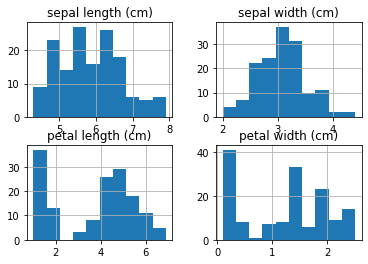

In [100]:
dados.hist()

Já o método **.boxplot()** gera diagramas de caixa dos dados numéricos:

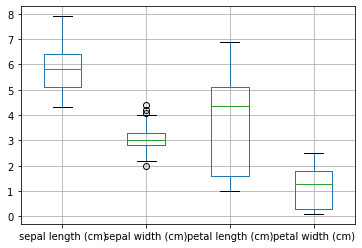

In [101]:
dados.boxplot()

O método **.plot.scatter()** gera gráficos de dispersão. Como os gráficos de dispersão são 2D, isto é, tem dois eixos, um x e outro y, precisamos especificar qual coluna do nosso dataframe será o x e qual coluna será o y.

Vejamos o exemplo:

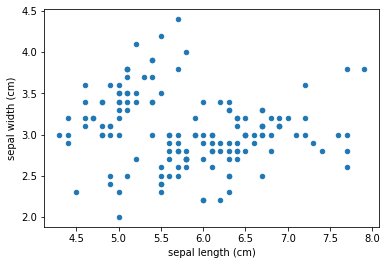

In [102]:
dados.plot.scatter(x='sepal length (cm)',
                   y='sepal width (cm)'
                  )

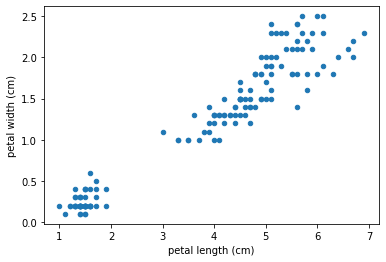

In [103]:
# Podemos repetir o procedimento para cada dispersão que queremos ver
dados.plot.scatter(x='petal length (cm)', y='petal width (cm)')

Nós também podemos fazer os mesmos gráficos que fizemos utilizando métodos nativos do **pandas** usando métodos do **seaborn**.

Vejamos os exemplos:

In [104]:
import seaborn as sns

In [ ]:
# Histogramas
sns.histplot(data=dados)

In [ ]:
# Boxplot
sns.boxplot(data=dados)

O Seaborn tem um método bastante interessante que plota todas as dispersões e todas as distribuições.

Perceba que o parâmetro **hue** recebe o nome da coluna de classe. Ele irá pintar cada ponto de acordo com o tipo de flor.

Vejamos:

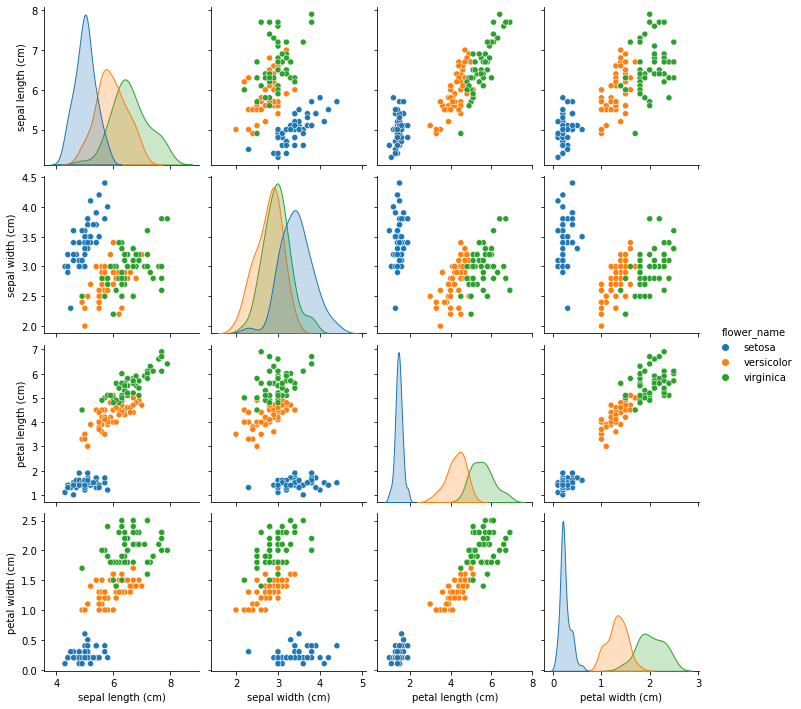

In [105]:
sns.pairplot(dados, hue='flower_name')

-------------------------

## Exercício - Íris Data set

Nas **estatísticas** e **plots** que realizamos no exemplo 2, os dados foram considerados sobre todos os tipos de flores. Considere agora separar os dados em 3 dataframes diferentes, cada um com um tipo de flor. Refaça as estatísticas e plote novos gráficos para cada um dos dataframes.

Você é capaz de propor um método de classificação das flores a partir da análise dos dados?

In [141]:
## Colorar código a partir daqui
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
iris = datasets.load_iris()

In [114]:
dados = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [ ]:
iris.target

In [117]:
def mapear_nomes(numero_classe):
    flower_map = {
        0:iris.target_names[0],
        1:iris.target_names[1],
        2:iris.target_names[2]
    }
    return(flower_map[numero_classe])



In [122]:
dados['flower'] = iris.target

In [123]:
dados['flower_name'] = dados['flower'].apply(mapear_nomes)

In [125]:
dados = dados.drop(columns=['flower'])

In [128]:
dados_versi = dados[dados['flower_name'] == 'versicolor']

In [132]:
dados_versi.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


TypeError: ignored

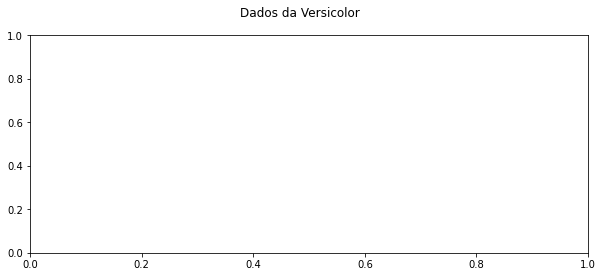

In [142]:
fig, axes = plt.subplots(1, 1, figsize=(10, 4))
fig.suptitle('Dados da Versicolor')


sns.histplot(ax=axes[0],
            data=dados_versi, # Agora a coluna do dataframe só com gafanhotos
            kde=True,
            bins=10,
            linewidth=0.7,
            color='green'
            )

In [129]:
dados_seto = dados[dados['flower_name'] == 'setosa']

In [133]:
dados_seto.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


In [130]:
dados_virg = dados[dados['flower_name'] == 'virginica']

In [134]:
dados_virg.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


In [131]:
type(dados_virg)

pandas.core.frame.DataFrame

In [ ]:
# Deixar eles fazerem e depois mostrar o dados.groupby('flower_name').mean()
# dados.groupby('flower_name').std()